In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as ttp
from sklearn.metrics import classification_report
import re
import string
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data=pd.read_csv("/content/heart.csv")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape

(303, 14)

In [4]:
data_1_manual_testing = data.head(10)
for i in range(2,12,1):
  data.drop([i],axis=0, inplace=True)
data_2_manual_testing = data.tail(10)
for i in range(302,292,-1):
  data.drop([i],axis=0, inplace=True)

data_manual_testing = pd.concat([data_1_manual_testing,data_2_manual_testing], axis=0)
data_manual_testing.to_csv("manual_testing.csv ")

In [5]:
x=data["age"]
y=data["output"]

In [6]:
x_train,x_test,y_train,y_test=ttp(x,y,test_size=0.25,random_state=0)

In [7]:
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)

In [8]:
x_train.shape

(212, 1)

In [9]:
if x_train.shape[1] == 1:
    x_train = x_train.values.reshape(-1, 1)

In [10]:
print(type(x_test))

<class 'pandas.core.series.Series'>


In [11]:
x_test = x_test.values.reshape(-1, 1)

In [12]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
accuracy = LR.score(x_test,y_test).round(2)
print("Accuracy is" , accuracy)
pred_LR= LR.predict(x_test)
print(classification_report(y_test,pred_LR))

Accuracy is 0.59
              precision    recall  f1-score   support

           0       0.70      0.42      0.52        38
           1       0.54      0.79      0.64        33

    accuracy                           0.59        71
   macro avg       0.62      0.60      0.58        71
weighted avg       0.62      0.59      0.58        71



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[16 22]
 [ 7 26]]


<Axes: >

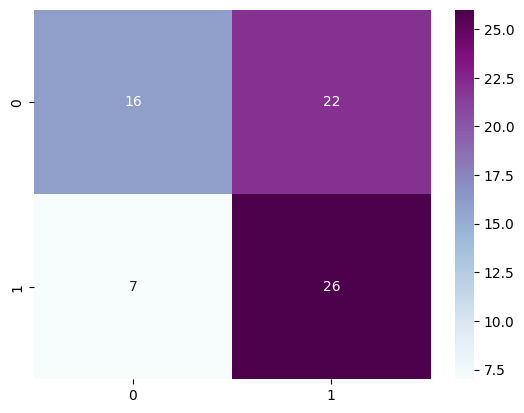

In [13]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,pred_LR)
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="BuPu",annot=True)

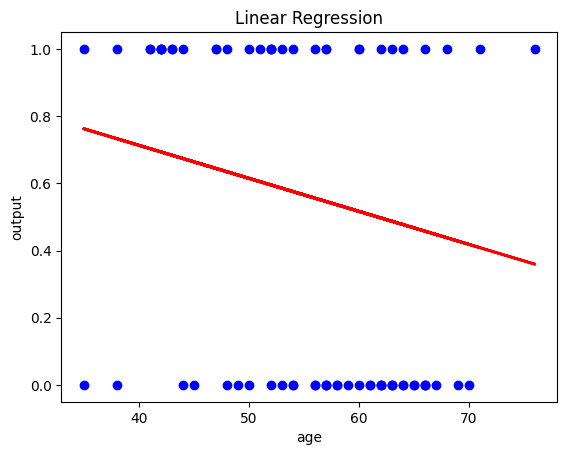

In [14]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.xlabel('age')
plt.ylabel('output')
plt.title('Linear Regression')
plt.show()